# Behavioral with eye data

# Import Packages

In [1]:
import pandas as pd; import os; import pickle; import numpy as np
import seaborn as sb; import warnings; import scipy.stats as stats
import itertools; from matplotlib import pyplot as plt; import ast
import json; import re; from datetime import datetime; import time
import hypertools as hyp; import numpy as np; import seaborn as sb
import statsmodels.api as sm; import statsmodels.formula.api as smf
import pingouin
from analysis_helpers import *
sb.set_style(style="white")
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext rpy2.ipython
%R require(ggplot2)

array([1], dtype=int32)

# Load Data

In [2]:
with open("/Users/kirstenziman/Documents/github/attention-memory-task/figures/behavioral_data.pkl",'rb') as fp:
    combo = pickle.load(fp)

with open("/Users/kirstenziman/Documents/github/attention-memory-task/figures/rate_new_df2.pkl", "rb") as fp:
    rate_new_df2 = pickle.load(fp)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kirstenziman/Documents/github/attention-memory-task/figures/rate_new_df2.pkl'

In [3]:
combo[combo['Attention Level']=='Novel'].head()
#rate_new_df2['Attention_Level'].unique()

,Unnamed: 0,Subject,Trial Type,Run,Cued Composite,Uncued Composite,Cued Face,Cued Place,Uncued Face,Uncued Place,...,Familiarity Rating,Attention Level,Cue Validity,Post Invalid Cue,Pre Invalid Cue,Attention Button,Rating History,Stimulus Onset,Stimulus End,Attention Probe
80,10,10,Memory,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Novel,NaN,NaN,NaN,NaN,NaN,1.538591e+09,1.538591e+09,NaN
82,12,10,Memory,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Novel,NaN,NaN,NaN,NaN,NaN,1.538591e+09,1.538591e+09,NaN
85,15,10,Memory,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Novel,NaN,NaN,NaN,NaN,NaN,1.538591e+09,1.538591e+09,NaN
86,16,10,Memory,0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,Novel,NaN,NaN,NaN,NaN,NaN,1.538591e+09,1.538591e+09,NaN
87,17,10,Memory,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Novel,NaN,NaN,NaN,NaN,NaN,1.538591e+09,1.538591e+09,NaN


# Violin, ttest, ANOVA

In [4]:
# group data by Subject and Attention Level, then plot
sub_split = combo.groupby(['Subject','Attention Level'],as_index=False)['Familiarity Rating'].mean()
ax1 = sb.violinplot(x='Attention Level',y='Familiarity Rating', 
                    data=sub_split[sub_split['Category']=='Place'], palette={"Full": "blue", "None": "orange", "Category":"purple","Side":"red","Novel":"green"})
plt.show()

# ANOVA & ttests
pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level'], subject='Subject', data=sub_split)

# l = sub_split['Attention Level'].unique()
# for pair in list(itertools.combinations(l, r=2)):
#     t = stats.ttest_rel(sub_split[sub_split['Attention Level']==pair[0]]['Familiarity Rating'], 
#                         sub_split[sub_split['Attention Level']==pair[1]]['Familiarity Rating'])    
#     if t[1]<.05:
#         print(pair[0]+" vs. "+pair[1])

KeyError: 'Category'

# ANOVA

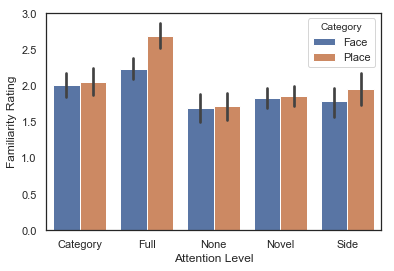

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Attention Level,20.820,4,116,5.205,42.661,5.795387e-22,3.595687e-12,0.595,0.503
1,Category,1.590,1,29,1.590,7.244,1.168735e-02,1.168735e-02,0.200,1.000
2,Attention Level * Category,2.051,4,116,0.513,11.095,1.179823e-07,3.218652e-04,0.277,0.398


In [8]:
# group data by Subject and Attention Level, then plot
sub_split = combo.groupby(['Subject','Attention Level','Category'],as_index=False)['Familiarity Rating'].mean()
ax1 = sb.barplot(x='Attention Level',y='Familiarity Rating', hue='Category', data=sub_split)#, palette={"Full": "blue", "None": "orange", "Category":"purple","Side":"red","Novel":"green"})
plt.show()

# ANOVA ###########################
pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level','Category'], subject='Subject', data=sub_split)

# Gaze Regression

### regressing out the effects of cued cateogry and eye gaze
Full and Side significantly higher familiarity than Category and None

In [9]:
rate_new_df2.head()

NameError: name 'rate_new_df2' is not defined

In [10]:
# ANOVA ###########################
sb.violinplot(x='Familiarity_Rating', y='Gaze_Proportion', data=rate_new_df2)
pingouin.rm_anova(dv='Adjusted Familiarity', within=['Attention_Level'], subject='Subject', data=rate_new_df2)

NameError: name 'rate_new_df2' is not defined

In [11]:
rate_new_df2['Attention_Level'].unique()

NameError: name 'rate_new_df2' is not defined

In [12]:
group = rate_new_df2.groupby(['Subject','Attention_Level','Image_Category'], as_index=False)['Adjusted Familiarity'].mean()
sb.boxplot(x='Attention_Level', y='Adjusted Familiarity', data=group) #hue='Image_Category', 

NameError: name 'rate_new_df2' is not defined

In [13]:
pingouin.rm_anova(dv='Adjusted Familiarity', within=['Attention_Level', 'Image_Category'], subject='Subject', data=group)

NameError: name 'group' is not defined

In [14]:
ROC_plot(group)

NameError: name 'group' is not defined

# Some extra analyses in R

In [15]:
%R -i rate_new_df2 

NameError: name 'rate_new_df2' is not defined

In [16]:
%R rate_new_df2

# in R, regress out gaze proportion
# account for random subject effects and random image effects

# look at familiraity rating by attention level, accounting for everything

%R library(lmer)
%R library(lmer4)
%R library(ggplot2)
%R library(lmerTest)
%R library(reshape)
%R library(ggplot2)
%R library(aov)


Error in withVisible({ : object 'rate_new_df2' not found

Error in library(lmer) : there is no package called ‘lmer’

Error in library(lmer4) : there is no package called ‘lmer4’

Error in library(aov) : there is no package called ‘aov’


In [17]:
%R library(lmerTest)
%R mixed_model <- lmer(Familiarity_Rating ~ Gaze_Proportion + Attention_Level + (1|Subject) + (1|Image_Category) + (1|Run), data = rate_new_df2)
%R anova(mixed_model)
%R plot(mixed_model)
%R write.csv(rate_new_df2, 'rate_new.csv')
%R write.csv(combo, 'combo.csv')


Error: 'data' not found, and some variables missing from formula environment

Error in anova(mixed_model) : object 'mixed_model' not found

Error in plot(mixed_model) : object 'mixed_model' not found

Error in is.data.frame(x) : object 'rate_new_df2' not found

Error in is.data.frame(x) : object 'combo' not found


In [18]:
%R a <- lm(Familiarity_Rating ~ Gaze_Proportion + Attention_Level , data = rate_new_df2)
%R anova(a)
%R plot(a)


Error in is.data.frame(data) : object 'rate_new_df2' not found

Error in anova(a) : object 'a' not found

Error in plot(a) : object 'a' not found


In [19]:
rate_new_df2.head()

NameError: name 'rate_new_df2' is not defined

In [ ]:
%R clmm(Familiarity_Rating ~ Gaze_Proportion + Attention_Level + (1|Subject), data = dat)